In [95]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


database_service = "sqlite"
database = "jupiter.db"
connectable = f"{database_service}:///{database}"

query = 'SELECT "group" FROM moons'
groups = pd.read_sql(query, connectable)

In [90]:

import sqlite3

connection = sqlite3.connect('jupiter.db')

cursor = connection.cursor()

columns_query = "PRAGMA table_info(moons);"
cursor.execute(columns_query)
columns = cursor.fetchall()

# Print column names
print("Column names for the 'moons' table:")
for column in columns:
    print(column[1])

# Close the cursor and connection
cursor.close()
connection.close()


Column names for the 'moons' table:
moon
period_days
distance_km
radius_km
mag
mass_kg
group
ecc
inclination_deg


In [108]:
import pandas as pd
import matplotlib.pyplot as plt

class Moons:
    def __init__(self, db):
    
        database_service = "sqlite"
        self.connectable = f"{database_service}:///{db}"
        self.load_data()
        
    def load_data(self):
       
        query = "SELECT * FROM moons"
        self.data = pd.read_sql(query, self.connectable)
        
    def stats(self, decimal_places=3):

        statdp = self.data.describe()
        statdp2 = statdp.round(decimal_places)
        return statdp2

    def correlations(self, decimal_places=3):

        corrdp = self.data.corr()
        corrdp2 = corrdp.round(decimal_places)
        return corrdp2
        
    def plot_distance_histogram(self):
        plt.hist(self.data['distance_km'], bins=20, color='skyblue', edgecolor='black')
        plt.title('Distribution of Moon Distances from Jupiter')
        plt.xlabel('Distance (km)')
        plt.ylabel('Frequency')
        plt.show()

    def plot_by_group(self):
        groups = self.data['group'].unique()
        for group in groups:
            group_data = self.data[self.data['group'] == group]
            plt.scatter(group_data['period_days'], group_data['distance_km'], label=group)
        plt.xlabel('Period Days')
        plt.ylabel('Distance km')
        plt.legend(title='Groups', loc='lower right')
        plt.title('Scatter Plot of Period Days vs Distance km by Group')
        plt.show()
    
    def extract_moon_data(self, moon_name):
        # Extract data for a specific moon
        moon_data = self.data[self.data['moon'] == moon_name]
        return moon_data

Correlation Statistics:


C:\Users\nickh\AppData\Local\Temp\ipykernel_50700\4170614056.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrdp = self.data.corr()


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
period_days,1.000,0.992,-0.534,0.743,-0.504,0.737,0.969
distance_km,0.992,1.000,-0.567,0.799,-0.453,0.751,0.954
radius_km,-0.534,-0.567,1.000,-0.887,0.968,-0.479,-0.488
mag,0.743,0.799,-0.887,1.000,-0.861,0.555,0.689
mass_kg,-0.504,-0.453,0.968,-0.861,1.000,-0.543,-0.489
ecc,0.737,0.751,-0.479,0.555,-0.543,1.000,0.646
inclination_deg,0.969,0.954,-0.488,0.689,-0.489,0.646,1.000


Summary Statistics:


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
count,56.000,5.600000e+01,56.000,53.000,6.000000e+00,56.000,56.000
mean,525.998,1.775655e+07,158.970,20.418,6.551798e+22,0.223,113.572
std,272.670,8.253688e+06,557.731,4.927,6.010469e+22,0.127,64.563
min,0.290,1.280000e+05,1.000,4.610,2.080000e+18,0.000,0.030
25%,258.750,1.170252e+07,1.500,20.800,1.200276e+22,0.159,30.582
50%,632.500,2.129009e+07,2.000,22.500,6.865891e+22,0.228,148.600
75%,725.500,2.336375e+07,11.562,23.000,1.030252e+23,0.299,159.175
max,787.000,2.458309e+07,2634.100,23.700,1.481900e+23,0.611,166.200


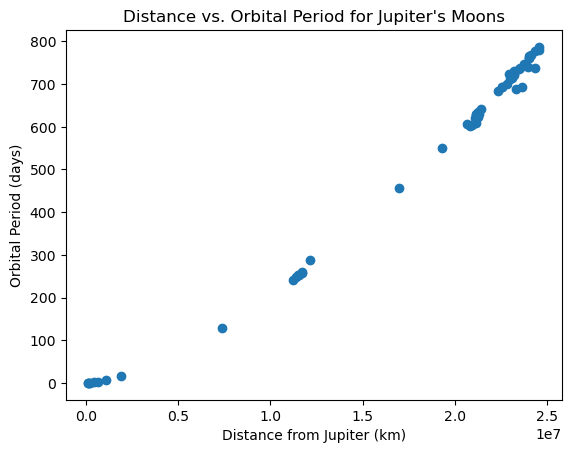

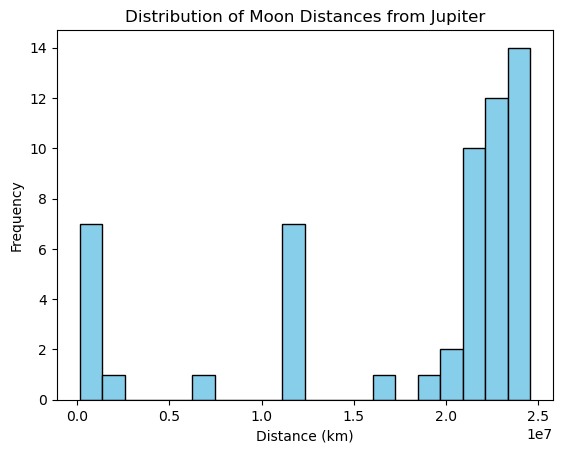

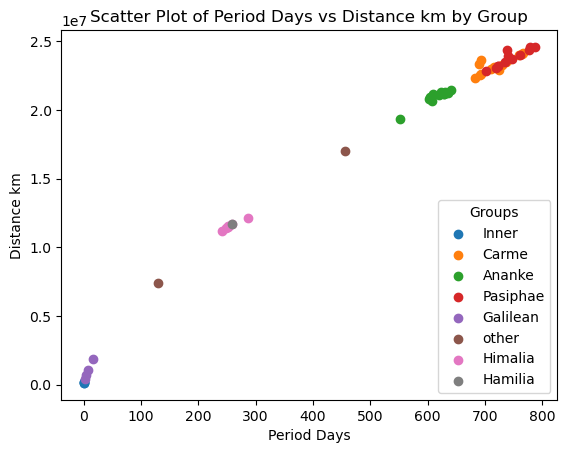

Data for Io:


,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
31,Io,1.75,421700.0,1821.6,5.02,8.931938e+22,Galilean,0.0041,2.2


In [109]:

jupiter_moons = Moons('jupiter.db')

correlations = jupiter_moons.correlations()
print("Correlation Statistics:")
display(correlations)


summary_stats = jupiter_moons.stats()
print("Summary Statistics:")
display(summary_stats)

jupiter_moons.plot_distance_histogram()

jupiter_moons.plot_by_group()

io_data = jupiter_moons.extract_moon_data('Io')
print("Data for Io:")
display(io_data)
